In [1]:
# brad barker - 4/21/2015
from impala.dbapi import connect
from impala.util import as_pandas
conn = connect(host='impalad', port=21050)
cur = conn.cursor()
sql='SELECT pres,yr,SUM(we)/SUM(we+me) weme_index FROM default.trans WHERE me > 0 AND we > 0 GROUP BY pres, yr'
cur.execute(sql)
dat = as_pandas(cur)

In [2]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(dat['yr'],dat['weme_index']) 
print "Intercept: %0.2f, Slope: %0.4f, R-Squared: %0.3f" % (intercept, slope, r_value*r_value)

Intercept: -5.61, Slope: 0.0033, R-Squared: 0.654


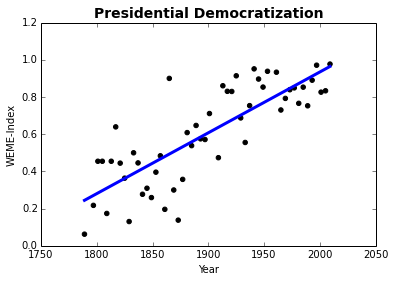

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Presidential Democratization', fontsize=14, fontweight='bold')
plt.xlabel('Year');plt.ylabel('WEME-Index')
plt.scatter(dat['yr'], dat['weme_index'],  color='black')
plt.plot([1789,2009], intercept+slope*np.array([1789,2009]), color='blue',linewidth=3)